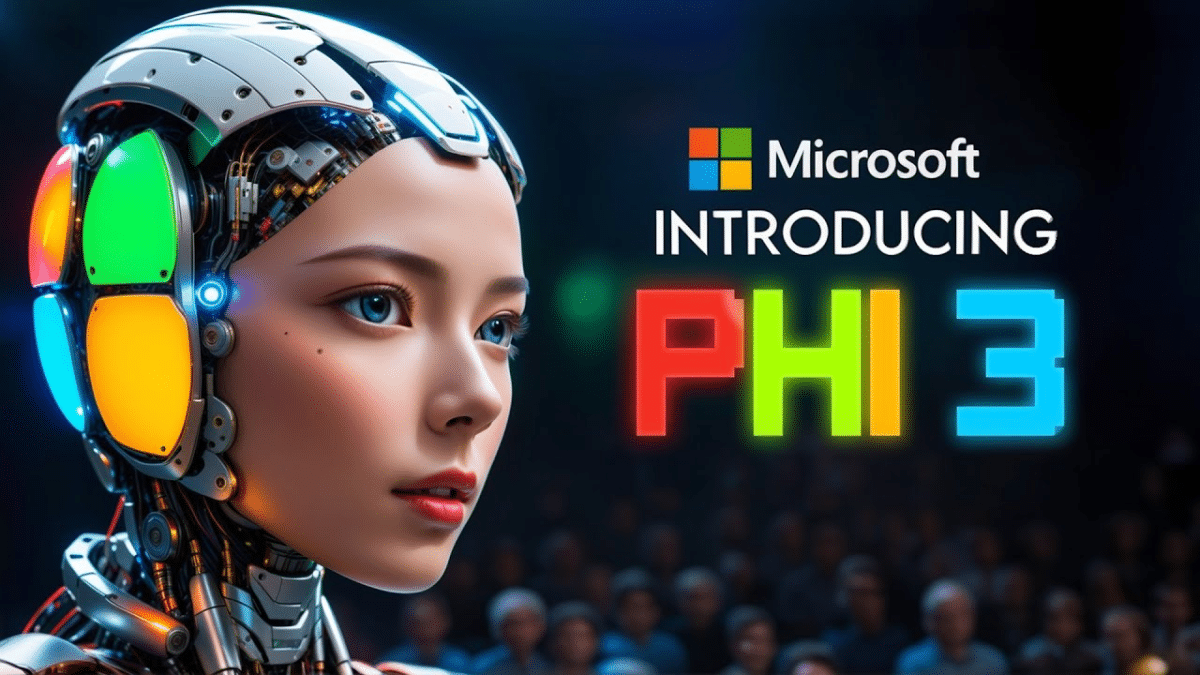

The Phi-3 model, specifically the `microsoft/Phi-3.5-mini-instruct`, is a state-of-the-art large language model designed to generate human-like text based on input prompts. Developed by Microsoft, this model belongs to the broader family of transformer-based architectures, which have revolutionized natural language processing (NLP) by enabling machines to understand and generate text with unprecedented accuracy and coherence.

### Key Features and Capabilities:
1. **Transformer Architecture**:
   - The Phi-3 model is built on the transformer architecture, a neural network design that uses self-attention mechanisms to process input data in parallel. This allows the model to capture intricate dependencies within the text, enabling it to generate contextually rich and coherent outputs.

2. **Fine-Tuned for Instruction Following**:
   - The "mini-instruct" suffix indicates that the Phi-3.5 model has been fine-tuned on datasets specifically designed to improve its ability to follow instructions. This makes it particularly useful for tasks where understanding and executing complex, multi-step instructions are crucial, such as conversational AI, customer support, and content generation.

3. **Causal Language Modeling**:
   - The Phi-3.5 model is typically fine-tuned for causal language modeling, where it predicts the next token in a sequence based on the preceding context. This autoregressive approach makes it effective at generating coherent and contextually appropriate text, whether completing a sentence, generating dialogue, or creating long-form content.

4. **Domain Adaptation**:
   - The model can be further fine-tuned on specific datasets to adapt to particular domains, such as medical, legal, or technical fields. This flexibility allows it to generate specialized content that meets the needs of various industries and applications.

5. **LoRA (Low-Rank Adaptation) Compatibility**:
   - The Phi-3 model is often used with techniques like LoRA, which reduces the number of trainable parameters by introducing low-rank matrices in certain layers of the model. This makes the model more efficient to fine-tune, especially when computational resources are limited.

6. **High-Precision Outputs**:
   - With support for mixed precision (such as fp16), the Phi-3 model can perform calculations faster and with less memory consumption, while still maintaining high accuracy in its outputs. This is particularly important for deploying the model in real-time applications where performance is critical.

### Applications:
- **Conversational AI**: The Phi-3 model excels in generating human-like responses in chatbots and virtual assistants, making it a valuable tool for customer service, technical support, and personal assistants.
- **Content Generation**: Its ability to understand and generate detailed text makes it ideal for automating content creation tasks, such as writing articles, creating reports, or generating creative stories.
- **Instruction Following**: The model's fine-tuning on instructional data enables it to execute complex tasks based on user input, making it suitable for applications in education, programming assistance, and more.

### Conclusion:
The `microsoft/Phi-3.5-mini-instruct` model represents a significant advancement in the field of NLP, combining cutting-edge transformer architecture with specialized fine-tuning to deliver powerful language generation capabilities. Whether used in conversational AI, content creation, or domain-specific applications, Phi-3 is a versatile and efficient model that can be adapted to meet a wide range of needs, making it a valuable asset in the modern AI toolkit.

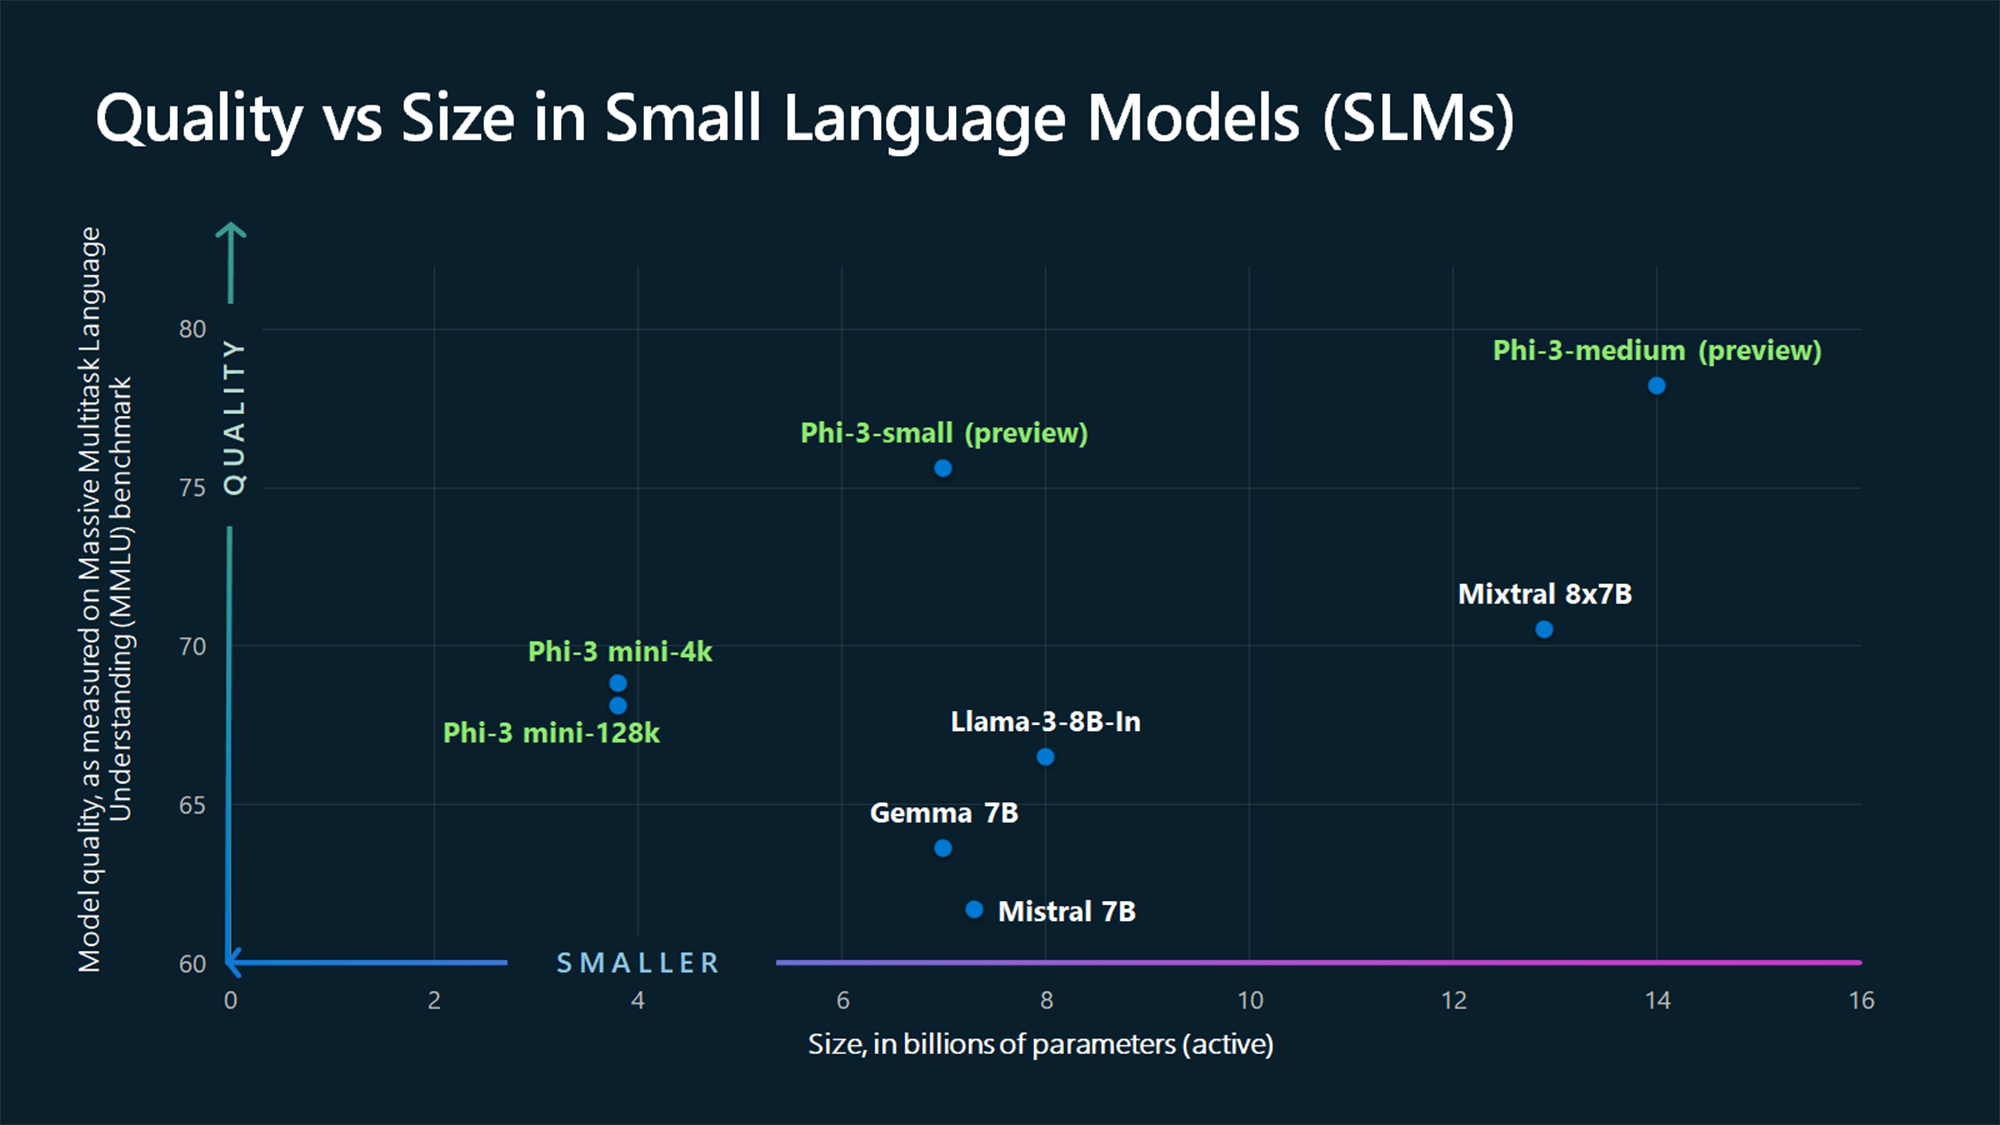

must read:
https://r.search.yahoo.com/_ylt=AwrFdgSbhsdmZgQAvYxXNyoA;_ylu=Y29sbwNiZjEEcG9zAzEEdnRpZAMEc2VjA3Nj/RV=2/RE=1725561756/RO=10/RU=https%3a%2f%2fredmondmag.com%2fArticles%2f2024%2f08%2f21%2fMicrosoft-Launches-Phi-Mini-Models.aspx/RK=2/RS=noTAwSrBeNZTeISRGSbuNeZx1_w-

### datasets and pre-trained models are avaiable on hugging face

In [2]:
import psutil
import torch

def get_memory_info():
    # Get RAM usage
    ram = psutil.virtual_memory()
    print(f"Total RAM: {ram.total / (1024 ** 3):.2f} GB")
    print(f"Available RAM: {ram.available / (1024 ** 3):.2f} GB")
    print(f"Used RAM: {ram.used / (1024 ** 3):.2f} GB")
    print(f"RAM Usage: {ram.percent}%\n")
    
    # Get Swap memory usage
    swap = psutil.swap_memory()
    print(f"Total Swap: {swap.total / (1024 ** 3):.2f} GB")
    print(f"Used Swap: {swap.used / (1024 ** 3):.2f} GB")
    print(f"Free Swap: {swap.free / (1024 ** 3):.2f} GB")
    print(f"Swap Usage: {swap.percent}%\n")

def get_gpu_info():
    if torch.cuda.is_available():
        gpu_count = torch.cuda.device_count()
        for i in range(gpu_count):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
            print(f"Total GPU Memory: {torch.cuda.get_device_properties(i).total_memory / (1024 ** 3):.2f} GB")
            print(f"Allocated GPU Memory: {torch.cuda.memory_allocated(i) / (1024 ** 3):.2f} GB")
            print(f"Cached GPU Memory: {torch.cuda.memory_reserved(i) / (1024 ** 3):.2f} GB\n")
    else:
        print("No GPU available.\n")

def get_cache_info():
    # Clear the CUDA cache and print GPU memory info again
    if torch.cuda.is_available():
        print("Clearing CUDA cache...\n")
        torch.cuda.empty_cache()
        get_gpu_info()

if __name__ == "__main__":
    print("RAM and Memory Info:")
    get_memory_info()
    
    print("GPU Info:")
    get_gpu_info()
    
    print("Cache Info:")
    get_cache_info()


RAM and Memory Info:
Total RAM: 2015.55 GB
Available RAM: 1899.99 GB
Used RAM: 97.35 GB
RAM Usage: 5.7%

Total Swap: 18.00 GB
Used Swap: 4.94 GB
Free Swap: 13.06 GB
Swap Usage: 27.4%

GPU Info:
GPU 0: NVIDIA H100 PCIe MIG 3g.40gb
Total GPU Memory: 39.38 GB
Allocated GPU Memory: 0.00 GB
Cached GPU Memory: 0.00 GB

Cache Info:
Clearing CUDA cache...

GPU 0: NVIDIA H100 PCIe MIG 3g.40gb
Total GPU Memory: 39.38 GB
Allocated GPU Memory: 0.00 GB
Cached GPU Memory: 0.00 GB



The dataset `ruslanmv/ai-medical-chatbot` contains 257k rows of medical dialogue data, specifically curated to train AI chatbots for healthcare applications. This extensive dataset includes various medical questions and responses, making it an ideal resource for fine-tuning models to provide accurate and contextually relevant medical advice.

In [3]:
from datasets import load_dataset

ds = load_dataset("ruslanmv/ai-medical-chatbot")

In [4]:
ds

DatasetDict({
    train: Dataset({
        features: ['Description', 'Patient', 'Doctor'],
        num_rows: 256916
    })
})

In [5]:
# Display the first few rows of the training dataset
len(ds['train']['Patient'])


256916

In [6]:
# Check the data types of the features
print(ds['train'].features)


{'Description': Value(dtype='string', id=None), 'Patient': Value(dtype='string', id=None), 'Doctor': Value(dtype='string', id=None)}


--------------------------------------------------EDA-------------------------------------------------------

In [7]:
# Check for missing values in each column
print("Missing values in 'Description':", sum([x is None for x in ds['train']['Description']]))
print("Missing values in 'Patient':", sum([x is None for x in ds['train']['Patient']]))
print("Missing values in 'Doctor':", sum([x is None for x in ds['train']['Doctor']]))


Missing values in 'Description': 0
Missing values in 'Patient': 0
Missing values in 'Doctor': 0


# basic statistical analysis

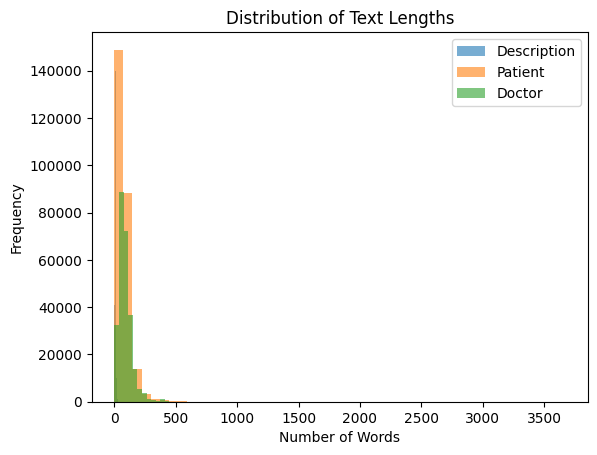

In [8]:
import matplotlib.pyplot as plt

# Calculate the length of text in each label
description_lengths = [len(x.split()) for x in ds['train']['Description']]
patient_lengths = [len(x.split()) for x in ds['train']['Patient']]
doctor_lengths = [len(x.split()) for x in ds['train']['Doctor']]

# Plot histograms
plt.hist(description_lengths, bins=50, alpha=0.6, label='Description')
plt.hist(patient_lengths, bins=50, alpha=0.6, label='Patient')
plt.hist(doctor_lengths, bins=50, alpha=0.6, label='Doctor')
plt.legend()
plt.title('Distribution of Text Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


wordcloud for description

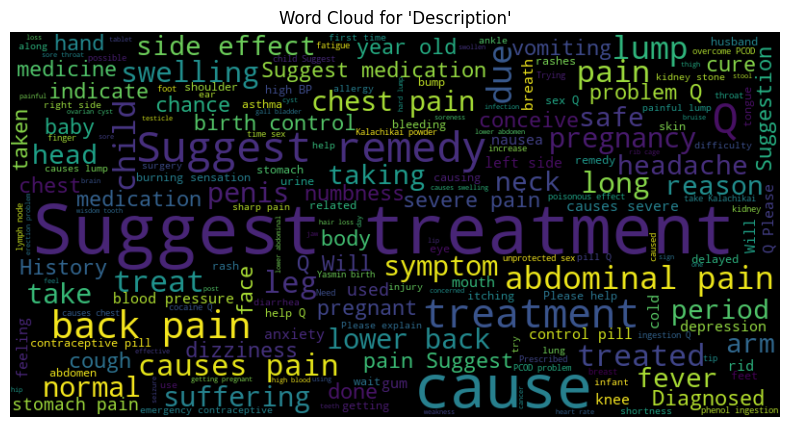

In [9]:
from wordcloud import WordCloud

# Generate word cloud for 'Description'
description_text = " ".join(ds['train']['Description'])
wordcloud = WordCloud(width=800, height=400).generate(description_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for 'Description'")
plt.show()




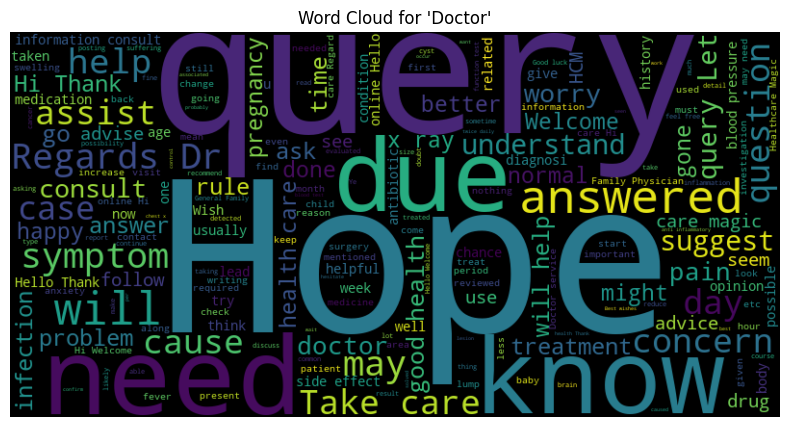

In [10]:
from wordcloud import WordCloud

# Generate word cloud for 'Description'
description_text = " ".join(ds['train']['Doctor'])
wordcloud = WordCloud(width=800, height=400).generate(description_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for 'Doctor'")
plt.show()




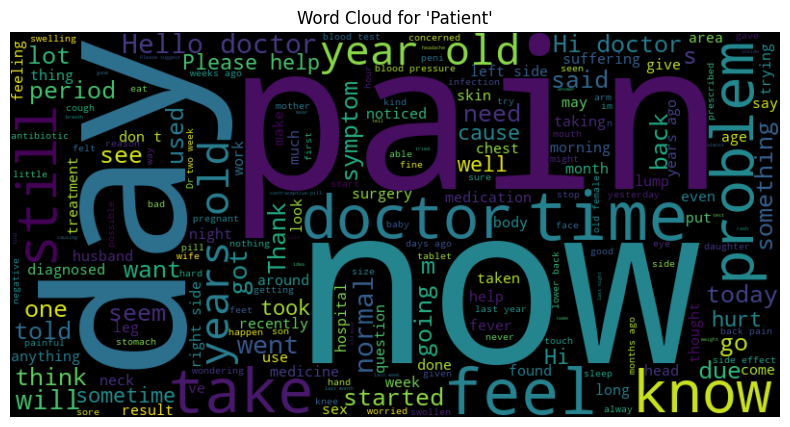

In [11]:
from wordcloud import WordCloud

# Generate word cloud for 'Description'
description_text = " ".join(ds['train']['Patient'])
wordcloud = WordCloud(width=800, height=400).generate(description_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for 'Patient'")
plt.show()

In [12]:
# Example: Count common words between 'Patient' and 'Doctor'
from collections import Counter

patient_words = Counter(" ".join(ds['train']['Patient']).split())
doctor_words = Counter(" ".join(ds['train']['Doctor']).split())

# Find common words
common_words = patient_words & doctor_words
print(common_words.most_common(10))


[('and', 598726), ('the', 522836), ('to', 448963), ('a', 348451), ('is', 329760), ('of', 297081), ('I', 261084), ('in', 251186), ('have', 226162), ('for', 210255)]


In [13]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
import torch

# Load the dataset
ds = load_dataset("ruslanmv/ai-medical-chatbot")

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3.5-mini-instruct", trust_remote_code=True)

# Load the model in float16 precision
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3.5-mini-instruct",
    trust_remote_code=True,
    torch_dtype=torch.float16
)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Phi3ForCausalLM(
  (model): Phi3Model(
    (embed_tokens): Embedding(32064, 3072, padding_idx=32000)
    (embed_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-31): 32 x Phi3DecoderLayer(
        (self_attn): Phi3Attention(
          (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
          (qkv_proj): Linear(in_features=3072, out_features=9216, bias=False)
          (rotary_emb): Phi3LongRoPEScaledRotaryEmbedding()
        )
        (mlp): Phi3MLP(
          (gate_up_proj): Linear(in_features=3072, out_features=16384, bias=False)
          (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
          (activation_fn): SiLU()
        )
        (input_layernorm): Phi3RMSNorm()
        (resid_attn_dropout): Dropout(p=0.0, inplace=False)
        (resid_mlp_dropout): Dropout(p=0.0, inplace=False)
        (post_attention_layernorm): Phi3RMSNorm()
      )
    )
    (norm): Phi3RMSNorm()
  )
  (lm_head): Linear(in_features=3072, out

In [14]:
import torch

def count_parameters_and_memory(model):
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_memory = sum(p.numel() * p.element_size() for p in model.parameters() if p.requires_grad)
    return total_params, total_memory

def format_memory_size(bytes_size):
    # Convert bytes to MB or GB
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if bytes_size < 1024:
            return f"{bytes_size:.2f} {unit}"
        bytes_size /= 1024

# Assuming 'model' is the variable holding your LLM
model_parameters, model_memory = count_parameters_and_memory(model)
formatted_memory = format_memory_size(model_memory)

print(f"The model has {model_parameters:,} parameters.")
print(f"The model is taking approximately {formatted_memory} of memory.")

The model has 3,821,079,552 parameters.
The model is taking approximately 7.12 GB of memory.


model takes 7.12 GB of memory in less precision

In [15]:
# Example: Select a random patient input from the dataset
patient_input = ds['train']['Patient'][0]
print("Patient Input:", patient_input)

# Prepare the input for the model
input_text = f"Patient: {patient_input}\nDoctor:"

# Create a pipeline for text generation
text_generator = pipeline("text-generation", model=model, tokenizer=tokenizer, device=0 if torch.cuda.is_available() else -1)

# Generate Doctor's response using max_new_tokens
doctor_output = text_generator(input_text, max_new_tokens=50, do_sample=True, num_return_sequences=1)
print("Generated Doctor Output:", doctor_output[0]['generated_text'])

# Prepare the input for the Description based on the patient and doctor's interaction
input_text_for_description = f"Patient: {patient_input}\nDoctor: {doctor_output[0]['generated_text']}\nDescription:"

# Generate Description using max_new_tokens
description_output = text_generator(input_text_for_description, max_new_tokens=50, do_sample=True, num_return_sequences=1)
print("Generated Description Output:", description_output[0]['generated_text'])


Patient Input: Hi doctor,I am just wondering what is abutting and abutment of the nerve root means in a back issue. Please explain. What treatment is required for annular bulging and tear?


The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
You are not running the flash-attention implementation, expect numerical differences.


Generated Doctor Output: Patient: Hi doctor,I am just wondering what is abutting and abutment of the nerve root means in a back issue. Please explain. What treatment is required for annular bulging and tear?
Doctor: Hello! I'd be glad to explain the terms you mentioned and discuss potential treatments for an annular bulge and tear in the spinal nerve root, which is often referred to as a herniated disc.

**
Generated Description Output: Patient: Hi doctor,I am just wondering what is abutting and abutment of the nerve root means in a back issue. Please explain. What treatment is required for annular bulging and tear?
Doctor: Patient: Hi doctor,I am just wondering what is abutting and abutment of the nerve root means in a back issue. Please explain. What treatment is required for annular bulging and tear?
Doctor: Hello! I'd be glad to explain the terms you mentioned and discuss potential treatments for an annular bulge and tear in the spinal nerve root, which is often referred to as a he

# testing tokenizer

In [16]:
# Sample text
sample_text = "I have a headache and feel dizzy."

# Tokenize the sample text
tokens = tokenizer.tokenize(sample_text)
print("Tokens:", tokens)

# Convert tokens to IDs
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print("Token IDs:", token_ids)

# Encode the text (this gives you both token IDs and attention mask)
encoded_input = tokenizer(sample_text, padding='max_length', max_length=10, truncation=True)
print("Encoded Input:", encoded_input)

# Decode the token IDs back to text
decoded_text = tokenizer.decode(token_ids)
print("Decoded Text:", decoded_text)


Tokens: ['▁I', '▁have', '▁a', '▁head', 'ache', '▁and', '▁feel', '▁d', 'iz', 'zy', '.']
Token IDs: [306, 505, 263, 2343, 1829, 322, 4459, 270, 466, 1537, 29889]
Encoded Input: {'input_ids': [306, 505, 263, 2343, 1829, 322, 4459, 270, 466, 1537], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Decoded Text: I have a headache and feel dizzy.


In [17]:
# Initialize variables to store maximum token lengths
max_tokens_patient = 0
max_tokens_description = 0
max_tokens_doctor = 0

# Iterate through the dataset to find the maximum token lengths
for example in ds['train']:
    patient_tokens = tokenizer(example['Patient'])['input_ids']
    description_tokens = tokenizer(example['Description'])['input_ids']
    doctor_tokens = tokenizer(example['Doctor'])['input_ids']
    
    max_tokens_patient = max(max_tokens_patient, len(patient_tokens))
    max_tokens_description = max(max_tokens_description, len(description_tokens))
    max_tokens_doctor = max(max_tokens_doctor, len(doctor_tokens))

# Print the results
print("Maximum number of tokens in Patient:", max_tokens_patient)
print("Maximum number of tokens in Description:", max_tokens_description)
print("Maximum number of tokens in Doctor:", max_tokens_doctor)


Maximum number of tokens in Patient: 4491
Maximum number of tokens in Description: 382
Maximum number of tokens in Doctor: 2842


In [18]:
# Print the dataset's first entry to check its structure
print(ds['train'][0])


{'Description': 'Q. What does abutment of the nerve root mean?', 'Patient': 'Hi doctor,I am just wondering what is abutting and abutment of the nerve root means in a back issue. Please explain. What treatment is required for\xa0annular bulging and tear?', 'Doctor': 'Hi. I have gone through your query with diligence and would like you to know that I am here to help you. For further information consult a neurologist online -->'}


In [19]:
import torch
from datasets import DatasetDict  # Import DatasetDict
from transformers import Trainer, TrainingArguments

# Define your function as before
def process_data_with_sliding_window(examples, stride=256):
    inputs = examples['Patient']
    targets = [f"Doctor: {doctor}\nDescription: {description}" for doctor, description in zip(examples['Doctor'], examples['Description'])]
    
    # Maximum input and output lengths
    max_length = 1024  # Adjust as needed, but ensure it fits within your GPU memory constraints
    stride = max_length // 2  # Adjust stride to overlap windows if needed

    # Tokenize with a sliding window
    model_inputs = {'input_ids': [], 'attention_mask': [], 'labels': []}
    
    for input_text, target_text in zip(inputs, targets):
        input_tokens = tokenizer(input_text, return_tensors="pt", max_length=max_length, truncation=True).input_ids.squeeze()
        target_tokens = tokenizer(target_text, return_tensors="pt", max_length=max_length, truncation=True).input_ids.squeeze()

        # Ensure tensors are at least 1-dimensional
        if input_tokens.dim() == 0:
            input_tokens = input_tokens.unsqueeze(0)
        if target_tokens.dim() == 0:
            target_tokens = target_tokens.unsqueeze(0)

        # Create sliding windows for inputs
        for i in range(0, len(input_tokens), stride):
            input_slice = input_tokens[i:i + max_length]
            target_slice = target_tokens[i:i + max_length]

            # Padding the slices if they are smaller than max_length
            if len(input_slice) < max_length:
                padding_length = max_length - len(input_slice)
                input_slice = torch.cat([input_slice, torch.zeros(padding_length, dtype=torch.long)])
            if len(target_slice) < max_length:
                padding_length = max_length - len(target_slice)
                target_slice = torch.cat([target_slice, torch.zeros(padding_length, dtype=torch.long)])

            model_inputs['input_ids'].append(input_slice)
            model_inputs['attention_mask'].append(torch.ones_like(input_slice))
            model_inputs['labels'].append(target_slice)
    
    # Convert lists to tensors and return as a dictionary
    model_inputs['input_ids'] = torch.stack(model_inputs['input_ids'])
    model_inputs['attention_mask'] = torch.stack(model_inputs['attention_mask'])
    model_inputs['labels'] = torch.stack(model_inputs['labels'])

    return model_inputs

tokenized_datasets = ds.map(process_data_with_sliding_window, batched=True, remove_columns=['Patient', 'Doctor', 'Description'])

# Continue with your original dataset split and training code
train_test_split = tokenized_datasets['train'].train_test_split(test_size=0.1)

# Use DatasetDict to recreate the train/validation split
train_test_split = DatasetDict({
    'train': train_test_split['train'],
    'validation': train_test_split['test'],
})

# Continue with data collator, training arguments, and model training as before


This code demonstrates the preparation and processing of a medical chatbot dataset for fine-tuning a transformer model, with a focus on managing large inputs efficiently using a sliding window approach. Here's a breakdown of the theory behind the code:

1. **Dataset Loading and Preparation**:
   - The dataset is loaded using the `datasets` library, which is split into training and testing subsets later.
   - The `process_data_with_sliding_window` function is defined to handle tokenization and processing of the dataset's text data with a sliding window approach.

2. **Sliding Window Tokenization**:
   - **Input and Target Setup**: The function starts by preparing the input (Patient) and target sequences (Doctor and Description). Each example from the dataset is tokenized separately.
   - **Sliding Window**: The sliding window technique is used to handle long sequences that exceed the model's maximum token length (`max_length`). The window slides over the input tokens with an overlap (controlled by the `stride` parameter) to ensure that long sequences are split into manageable chunks while retaining context.
   - **Padding**: If a token slice is smaller than `max_length`, it is padded with zeros to ensure uniform tensor sizes. This is crucial for batching during training, as all inputs must be the same size.

3. **Dataset Mapping**:
   - The `process_data_with_sliding_window` function is applied to the dataset using the `map` function. This transforms the entire dataset by tokenizing and splitting the data into the required format for model training. The original text columns (`Patient`, `Doctor`, and `Description`) are removed after processing.

4. **Train-Validation Split**:
   - The processed dataset is split into training and validation sets using `train_test_split`. This split is then organized into a `DatasetDict` to easily manage the two subsets during model training.

5. **Model Training Setup**:
   - Although not fully shown in the code, the next steps would involve setting up the `Trainer` from the `transformers` library with appropriate training arguments, data collator, and the processed dataset. This prepares the model for fine-tuning on the medical chatbot data.

**Theory Summary**:
- **Sliding Window**: This technique helps in managing long text sequences by breaking them into overlapping segments, preserving context while adhering to the model's token length constraints. It is particularly useful when working with limited GPU memory.
- **Tokenization and Padding**: The input and output sequences are tokenized into integers that the model can process. Padding ensures all sequences within a batch have the same length.
- **Efficient Dataset Handling**: The dataset is processed in a way that optimizes memory usage and prepares it for effective training of the transformer model, enhancing the chatbot's ability to generate medical responses.

In [20]:
print("Sample from training set:", train_test_split['train'][0])
print("Sample from validation set:", train_test_split['validation'][0])


Sample from training set: {'input_ids': [1619, 8750, 756, 24554, 310, 2319, 2586, 267, 373, 902, 10188, 322, 6567, 508, 445, 367, 515, 6592, 6152, 29879, 29973, 2296, 4083, 896, 526, 372, 23766, 322, 443, 510, 3921, 519, 29889, 1576, 2586, 267, 2615, 363, 263, 8000, 29892, 885, 370, 322, 2041, 1250, 29889, 1619, 28056, 884, 756, 263, 2846, 289, 568, 373, 902, 1250, 322, 22827, 29889, 2216, 1854, 565, 306, 881, 298, 533, 263, 282, 342, 2761, 2022, 1363, 306, 626, 15041, 1048, 773, 4023, 845, 22233, 29879, 29973, 1815, 366, 1371, 411, 738, 2472, 1048, 590, 4828, 29973, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [21]:
from transformers import AutoTokenizer, DataCollatorForLanguageModeling, Trainer, TrainingArguments, AutoModelForCausalLM
# Create a data collator for causal language modeling
data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=False  # Set to False because we're not using masked language modeling
)


The DataCollatorForLanguageModeling is a utility provided by the transformers library that helps in preparing batches of data for language model training. Specifically, it is designed to handle tokenized text sequences and create the necessary inputs for the model, such as input IDs and attention masks.

Tokenization:

Text data is tokenized into sequences of integers that the model can process. This process converts words or subwords into a format that the model understands.
Padding:

The collator pads sequences to ensure that all sequences in a batch have the same length. Padding is necessary because sequences within a batch can vary in length, and the model requires uniform input dimensions for efficient processing.
Causal Language Modeling:

Causal language modeling refers to predicting the next word in a sequence, given the previous words. This is different from masked language modeling, where random words in the sequence are masked, and the model has to predict the masked words. In causal language modeling, the model learns to predict the next token in the sequence using an autoregressive approach.
The parameter mlm=False indicates that masked language modeling is not used, and the collator will prepare data suitable for causal language modeling.
Benefits of Using DataCollatorForLanguageModeling:
Efficiency:

The data collator automates the process of padding, ensuring that all sequences in a batch are of uniform length, which is crucial for batch processing in GPUs. This leads to faster and more efficient training.
Correct Label Alignment:

In causal language modeling, the labels for the model's predictions are simply the input tokens shifted by one position. The collator handles this alignment automatically, ensuring that the model is trained correctly to predict the next token in the sequence.
Flexibility:

By setting mlm=False, the collator can be easily adapted for autoregressive language models (such as GPT-style models) that predict the next word in a sequence rather than filling in masked tokens.
Ease of Use:

The DataCollatorForLanguageModeling integrates seamlessly with the Trainer API in the transformers library, simplifying the process of setting up training loops, especially for large language models.
Handling Variable Length Sequences:

The collator ensures that varying lengths of sequences within a batch are padded correctly, preventing errors during model training and making the process more robust.
In summary, the DataCollatorForLanguageModeling is a powerful and efficient tool that simplifies the preparation of data for language modeling tasks, particularly when working with causal language models. It ensures that data is correctly formatted, padded, and aligned for optimal training performance.

In [22]:
# Print the model architecture to find suitable target modules
for name, param in model.named_parameters():
    print(name)


model.embed_tokens.weight
model.layers.0.self_attn.o_proj.weight
model.layers.0.self_attn.qkv_proj.weight
model.layers.0.mlp.gate_up_proj.weight
model.layers.0.mlp.down_proj.weight
model.layers.0.input_layernorm.weight
model.layers.0.post_attention_layernorm.weight
model.layers.1.self_attn.o_proj.weight
model.layers.1.self_attn.qkv_proj.weight
model.layers.1.mlp.gate_up_proj.weight
model.layers.1.mlp.down_proj.weight
model.layers.1.input_layernorm.weight
model.layers.1.post_attention_layernorm.weight
model.layers.2.self_attn.o_proj.weight
model.layers.2.self_attn.qkv_proj.weight
model.layers.2.mlp.gate_up_proj.weight
model.layers.2.mlp.down_proj.weight
model.layers.2.input_layernorm.weight
model.layers.2.post_attention_layernorm.weight
model.layers.3.self_attn.o_proj.weight
model.layers.3.self_attn.qkv_proj.weight
model.layers.3.mlp.gate_up_proj.weight
model.layers.3.mlp.down_proj.weight
model.layers.3.input_layernorm.weight
model.layers.3.post_attention_layernorm.weight
model.layers.4

In [23]:
# from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
# import torch
# from peft import LoraConfig, get_peft_model

# # Define LoRA configuration
# lora_config = LoraConfig(
#     r=8,  # Low rank
#     lora_alpha=32,  # Scaling parameter
#     target_modules=[
#         "self_attn.qkv_proj",  # Targeting query, key, value projections in attention
#         "self_attn.o_proj",    # Targeting output projection in attention
#         "mlp.gate_up_proj",    # Targeting gate-up projection in MLP
#         "mlp.down_proj"        # Targeting down projection in MLP
#     ],
#     lora_dropout=0.1,
#     bias="none"
# )

# # Apply LoRA to the model
# model = get_peft_model(model, lora_config)

# # Move the model to GPU if available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)


In [24]:
import torch

def count_parameters_and_memory(model):
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_memory = sum(p.numel() * p.element_size() for p in model.parameters() if p.requires_grad)
    return total_params, total_memory

def format_memory_size(bytes_size):
    # Convert bytes to MB or GB
    for unit in ['B', 'KB', 'MB', 'GB', 'TB']:
        if bytes_size < 1024:
            return f"{bytes_size:.2f} {unit}"
        bytes_size /= 1024

# Assuming 'model' is the variable holding your LLM
model_parameters, model_memory = count_parameters_and_memory(model)
formatted_memory = format_memory_size(model_memory)

print(f"The model has {model_parameters:,} parameters.")
print(f"The model is taking approximately {formatted_memory} of memory.")

The model has 3,821,079,552 parameters.
The model is taking approximately 7.12 GB of memory.


In [26]:
import torch
from datasets import DatasetDict
from transformers import Trainer, TrainingArguments, DataCollatorForSeq2Seq, AutoTokenizer, AutoModelForCausalLM
from peft import LoraConfig, get_peft_model

# Load the dataset
ds = load_dataset("ruslanmv/ai-medical-chatbot")

# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3.5-mini-instruct", trust_remote_code=True)

# Load the model in float16 precision
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3.5-mini-instruct",
    trust_remote_code=True,
    torch_dtype=torch.float16
)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define LoRA configuration
lora_config = LoraConfig(
    r=8,  # Low rank
    lora_alpha=32,  # Scaling parameter
    target_modules=[
        "self_attn.qkv_proj",  # Targeting query, key, value projections in attention
        "self_attn.o_proj",    # Targeting output projection in attention
        "mlp.gate_up_proj",    # Targeting gate-up projection in MLP
        "mlp.down_proj"        # Targeting down projection in MLP
    ],
    lora_dropout=0.1,
    bias="none"
)

# Apply LoRA to the model
model = get_peft_model(model, lora_config)

# Define your function for sliding window tokenization
def process_data_with_sliding_window(examples, stride=256):
    inputs = examples['Patient']
    targets = [f"Doctor: {doctor}\nDescription: {description}" for doctor, description in zip(examples['Doctor'], examples['Description'])]
    
    max_length = 1024
    stride = max_length // 2

    model_inputs = {'input_ids': [], 'attention_mask': [], 'labels': []}
    
    for input_text, target_text in zip(inputs, targets):
        input_tokens = tokenizer(input_text, return_tensors="pt", max_length=max_length, truncation=True).input_ids.squeeze()
        target_tokens = tokenizer(target_text, return_tensors="pt", max_length=max_length, truncation=True).input_ids.squeeze()

        if input_tokens.dim() == 0:
            input_tokens = input_tokens.unsqueeze(0)
        if target_tokens.dim() == 0:
            target_tokens = target_tokens.unsqueeze(0)

        for i in range(0, len(input_tokens), stride):
            input_slice = input_tokens[i:i + max_length]
            target_slice = target_tokens[i:i + max_length]

            if len(input_slice) < max_length:
                padding_length = max_length - len(input_slice)
                input_slice = torch.cat([input_slice, torch.zeros(padding_length, dtype=torch.long)])
            if len(target_slice) < max_length:
                padding_length = max_length - len(target_slice)
                target_slice = torch.cat([target_slice, torch.zeros(padding_length, dtype=torch.long)])

            model_inputs['input_ids'].append(input_slice)
            model_inputs['attention_mask'].append(torch.ones_like(input_slice))
            model_inputs['labels'].append(target_slice)
    
    model_inputs['input_ids'] = torch.stack(model_inputs['input_ids'])
    model_inputs['attention_mask'] = torch.stack(model_inputs['attention_mask'])
    model_inputs['labels'] = torch.stack(model_inputs['labels'])

    return model_inputs

# Tokenize the dataset
tokenized_datasets = ds.map(process_data_with_sliding_window, batched=True, remove_columns=['Patient', 'Doctor', 'Description'])

# Continue with your original dataset split and training code
train_test_split = tokenized_datasets['train'].train_test_split(test_size=0.1)

# Use DatasetDict to recreate the train/validation split
train_test_split = DatasetDict({
    'train': train_test_split['train'],
    'validation': train_test_split['test'],
})

# Define the data collator for dynamic padding
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-4,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=8,  # Reduced gradient accumulation steps to reduce the number of updates per epoch
    num_train_epochs=1,  # Reduce epochs to 1
    weight_decay=0.01,
    logging_dir="./logs",
    save_total_limit=2,
    fp16=True,
    push_to_hub=False,
    remove_unused_columns=False,
    max_grad_norm=1.0,
    dataloader_num_workers=2,
    dataloader_pin_memory=True
)

train_dataset = train_test_split['train'].select(range(1500))

# Initialize the Trainer with the limited training dataset
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=train_test_split['validation'].select(range(100)),# Use only 15k samples
 # You can also limit validation set if needed
    data_collator=data_collator
)

trainer.train()

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/opt/conda/envs/llm_bootcamp/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/opt/conda/envs/llm_bootcamp/lib/python3.10/site-packages/accelerate/accelerator.py:488: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_

Epoch,Training Loss,Validation Loss
0,No log,No log


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
TOKENIZERS_PARALLELISM=(true | false)


TrainOutput(global_step=187, training_loss=1.3888017787015374, metrics={'train_runtime': 560.5698, 'train_samples_per_second': 2.676, 'train_steps_per_second': 0.334, 'total_flos': 3.4331456327122944e+16, 'train_loss': 1.3888017787015374, 'epoch': 0.9973333333333333})

**i have fine tuned model on less data so that there are some issues with results. complete data required 76 hours of training. otherwise project is a complete pipeline of how we can fine tune the model


### 1. **LoRA Configuration Parameters (`LoraConfig`)**:
   - **`r=8`**: Specifies the rank of the low-rank matrices used in the LoRA layers. A lower rank reduces the number of trainable parameters, which can make the model more efficient while potentially limiting expressiveness.
   - **`lora_alpha=32`**: This is a scaling factor that controls the impact of the low-rank matrices on the model's output. A higher alpha increases the influence of the LoRA layers.
   - **`target_modules`**: This parameter lists the specific modules within the model to which LoRA should be applied. In this case, it includes:
     - `"self_attn.qkv_proj"`: Applies LoRA to the query, key, and value projections in the attention mechanism.
     - `"self_attn.o_proj"`: Applies LoRA to the output projection in the attention mechanism.
     - `"mlp.gate_up_proj"`: Applies LoRA to the gate-up projection in the multi-layer perceptron (MLP) part of the model.
     - `"mlp.down_proj"`: Applies LoRA to the down projection in the MLP part of the model.
   - **`lora_dropout=0.1`**: Introduces dropout in the LoRA layers to prevent overfitting. A dropout rate of 0.1 means that 10% of the units are randomly dropped during training.
   - **`bias="none"`**: Specifies that no additional bias parameters are added to the LoRA layers. This can simplify the model slightly.

### 2. **Data Collator for Seq2Seq (`DataCollatorForSeq2Seq`)**:
   - **`tokenizer`**: The tokenizer is passed to handle the tokenization of text data. It ensures that sequences are properly tokenized and padded before being fed into the model.
   - **`model=model`**: The model is passed to ensure that the collator is compatible with the specific architecture and requirements of the model being fine-tuned.

### 3. **Training Arguments (`TrainingArguments`)**:
   - **`output_dir="./results"`**: Specifies the directory where the model's checkpoints and logs will be saved during training. It's useful for organizing and accessing model outputs after training.
   - **`evaluation_strategy="epoch"`**: This sets the evaluation frequency. By choosing "epoch," the model is evaluated at the end of each epoch, allowing you to monitor performance over time.
   - **`learning_rate=2e-4`**: Defines the learning rate for the optimizer. A learning rate of 0.0002 is chosen, which is relatively small, ensuring that the model learns gradually without making large updates that could destabilize training.
   - **`per_device_train_batch_size=1`**: Sets the batch size per device (GPU or CPU) during training. A batch size of 1 is chosen, likely due to memory constraints or to stabilize training with large sequences.
   - **`per_device_eval_batch_size=1`**: Sets the batch size per device during evaluation. A batch size of 1 ensures consistency with the training setup and reduces memory usage during evaluation.
   - **`gradient_accumulation_steps=8`**: Defines the number of steps to accumulate gradients before performing a backward pass. This effectively increases the batch size to 8 without increasing memory usage, as gradients are accumulated over 8 steps.
   - **`num_train_epochs=1`**: Specifies the number of times the entire training dataset is passed through the model. Setting it to 1 means the model will only see each training example once, which is often used for initial experiments or when fine-tuning on a large dataset.
   - **`weight_decay=0.01`**: Adds L2 regularization to the model's weights during training. A weight decay of 0.01 helps prevent overfitting by penalizing large weights.
   - **`logging_dir="./logs"`**: Specifies the directory where logs are stored. These logs can be used to monitor the training process.
   - **`save_total_limit=2`**: Limits the number of saved checkpoints to 2. When the limit is reached, older checkpoints are deleted, helping to manage disk space.
   - **`fp16=True`**: Enables 16-bit floating-point precision for training. This reduces memory usage and speeds up training, particularly useful on modern GPUs that support mixed precision.
   - **`push_to_hub=False`**: Indicates whether to push the model to the Hugging Face Model Hub. Setting it to `False` means the model will not be uploaded.
   - **`remove_unused_columns=False`**: Keeps all columns in the dataset during training. This is important when the model or data collator might need columns that are not directly used as inputs.
   - **`max_grad_norm=1.0`**: Caps the gradient norm to 1.0 during training to prevent gradient explosion, which can stabilize training, especially when using large models or small batch sizes.
   - **`dataloader_num_workers=2`**: Sets the number of subprocesses used for data loading. More workers can speed up data loading, but the optimal number depends on your system's CPU.
   - **`dataloader_pin_memory=True`**: If `True`, data is loaded into pinned memory, which can speed up data transfers to the GPU. This is often beneficial when using GPUs for training.

### 4. **Trainer Initialization Parameters**:
   - **`model=model`**: The model being fine-tuned is passed to the Trainer, which handles the training loop, optimization, and evaluation.
   - **`args=training_args`**: The training arguments configured above are passed to the Trainer, defining how training and evaluation should be conducted.
   - **`train_dataset=train_dataset`**: Specifies the dataset used for training. In this case, it's a limited subset of the original dataset for quicker training iterations.
   - **`eval_dataset=train_test_split['validation'].select(range(100))`**: Specifies the dataset used for evaluation. A subset of 100 samples is selected for faster evaluation during the training process.
   - **`data_collator=data_collator`**: The `DataCollatorForSeq2Seq` collator is used to handle padding and formatting of batches during training and evaluation.

### Summary:

These parameters collectively ensure that the model is fine-tuned efficiently while handling large sequences, optimizing memory usage, and reducing computational overhead. The LoRA technique reduces the number of trainable parameters, the sliding window approach manages long sequences, and the training arguments fine-tune the training process to work within resource constraints.